In [796]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/properties.csv")
print(df.columns)

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')


In [797]:
# Keep max number of frontages to 4
df.loc[df['nbr_frontages'] > 4, 'nbr_frontages'] = 4
df['nbr_frontages'] = df['nbr_frontages'].fillna(1)

# Keep max number of bedrooms to 12
df.loc[df['nbr_bedrooms'] > 12, 'nbr_bedrooms'] = 12
df['nbr_bedrooms'] = df['nbr_bedrooms'].fillna(0)

# Fill blank garden and terrace areas with 0
df['garden_sqm'] = df['garden_sqm'].fillna(0)
df['terrace_sqm'] = df['terrace_sqm'].fillna(0)

# Fill blank surface_land_sqm
df['surface_land_sqm'] = df['garden_sqm'] + df['terrace_sqm'] + df['total_area_sqm'] / 2 #assume 2 floors

# Remove rows with blank 
df.dropna(subset=['total_area_sqm'], inplace=True)

In [798]:
# Perform one-hot encoding for the 'property_type' column
type_one_hot = pd.get_dummies(df['property_type'], prefix='type')

# Drop the original column from the DataFrame
df = df.drop(columns=['property_type'])

In [799]:
# Perform one-hot encoding for the 'locality' column
locality_one_hot = pd.get_dummies(df['locality'], prefix='locality')

# Drop the original 'locality' column from the DataFrame
df = df.drop(columns=['locality'])

In [800]:
# Identify numeric columns
df = df.select_dtypes(include=['float64', 'int64'])
df.columns

# Drop columns
df = df.drop(['latitude', 'longitude', 'id', 'cadastral_income', 'zip_code', 
                              'construction_year', 'primary_energy_consumption_sqm'], axis=1)

# Concatenate the one-hot encoded locality columns with the original DataFrame
#df = pd.concat([df, locality_one_hot], axis=1)

# Now df contains the one-hot encoded locality features along with other relevant features
print(df.columns)


Index(['price', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages',
       'nbr_bedrooms', 'fl_furnished', 'fl_open_fire', 'fl_terrace',
       'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool',
       'fl_floodzone', 'fl_double_glazing'],
      dtype='object')


In [769]:
# Remove outliers 
df = df[df['total_area_sqm'] < 5000]
df = df[df['price'] < 8000000]
df = df[df['surface_land_sqm'] < 12000]
print(df['total_area_sqm'].describe())
print(df['surface_land_sqm'].describe())
print(df['price'].describe())

count    72697.000000
mean       176.675379
std        220.881238
min          0.000000
25%         90.000000
50%        129.000000
75%        190.000000
max       4940.000000
Name: total_area_sqm, dtype: float64
count    72697.000000
mean       409.029437
std        878.844647
min          0.000000
25%         74.000000
50%        114.000000
75%        394.000000
max      11982.000000
Name: surface_land_sqm, dtype: float64
count    7.269700e+04
mean     4.172143e+05
std      3.934788e+05
min      7.600000e+04
25%      2.450000e+05
50%      3.290000e+05
75%      4.520000e+05
max      7.850000e+06
Name: price, dtype: float64


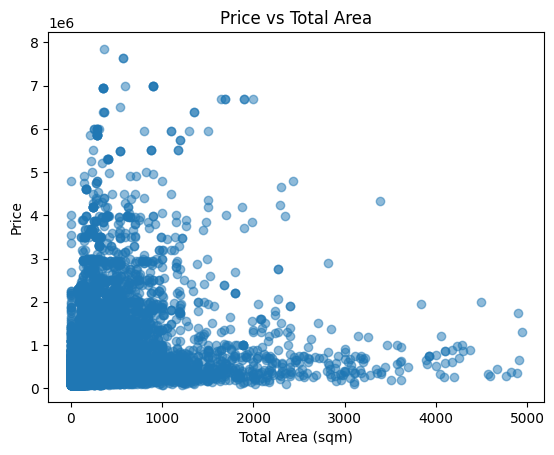

In [770]:
# Plot price vs total_area_sqm
plt.scatter(df['total_area_sqm'], df['price'], alpha=0.5)
plt.title('Price vs Total Area')
plt.xlabel('Total Area (sqm)')
plt.ylabel('Price')
plt.show()

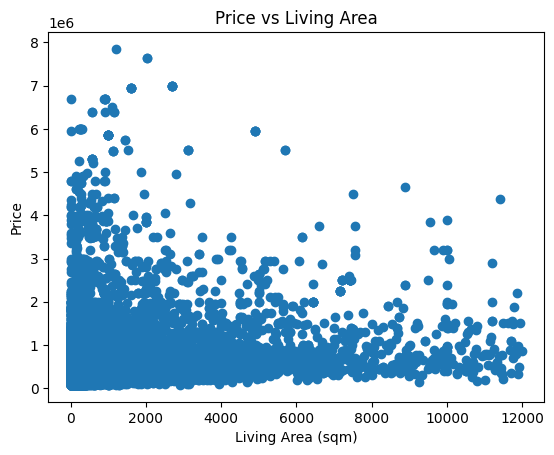

In [771]:
plt.scatter(df['surface_land_sqm'], df['price'])
plt.title('Price vs Living Area')
plt.xlabel('Living Area (sqm)')
plt.ylabel('Price')
plt.show()

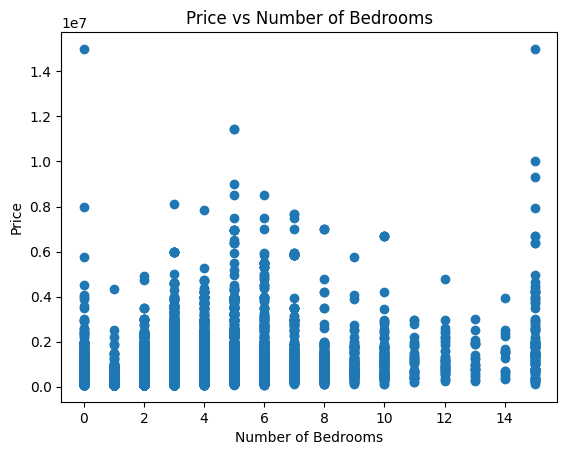

In [785]:

plt.scatter(df['nbr_bedrooms'], df['price'])
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

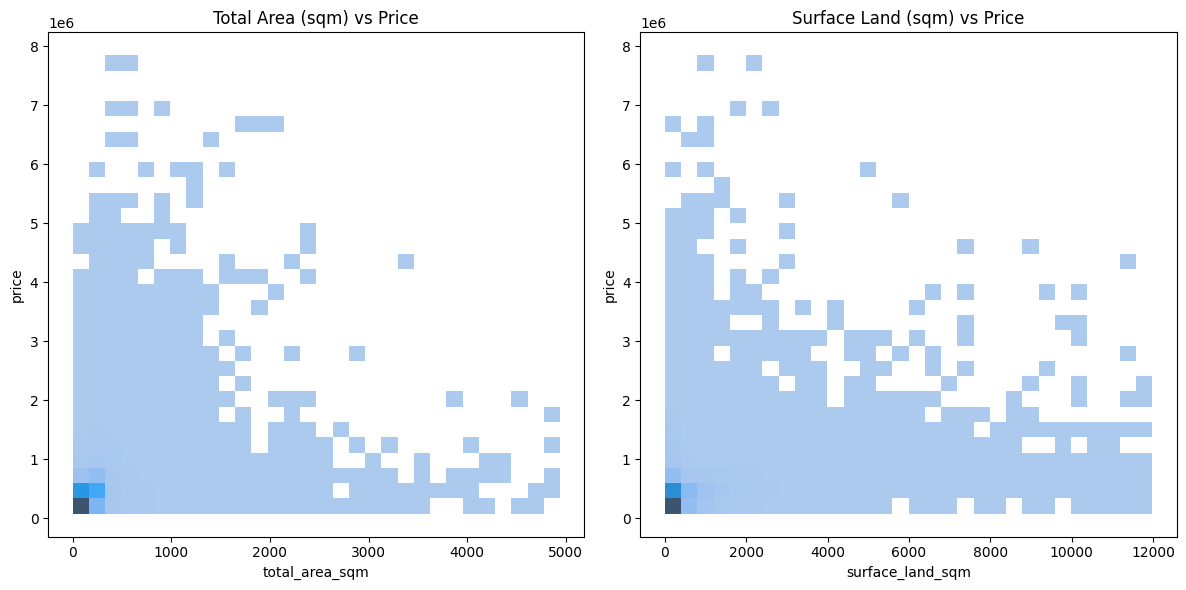

In [773]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'total_area_sqm' against price
sns.histplot(df, x='total_area_sqm', y='price', ax=axes[0], bins=30, kde=True)
axes[0].set_title('Total Area (sqm) vs Price')

# Plot 'surface_land_sqm' against price
sns.histplot(df, x='surface_land_sqm', y='price', ax=axes[1], bins=30, kde=True)
axes[1].set_title('Surface Land (sqm) vs Price')

plt.tight_layout()
plt.show()


In [789]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'APARTMENT'

In [775]:

# Check for missing values in each column
columns_with_blanks = df.columns[df.isna().any()].tolist()

# Print columns with missing values
print("Columns with missing values:")
print(columns_with_blanks)


Columns with missing values:
[]


In [776]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create scaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Define columns to scale
columns_to_scale = ['total_area_sqm', 'surface_land_sqm']

# Apply Min-Max scaling to multiple columns
df_scaled_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

# Apply Standardization to multiple columns
df_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

# Concatenate the scaled features with the original DataFrame
df_scaled = pd.concat([df.drop(columns=columns_to_scale), df_scaled_min_max, df_scaled_standard], axis=1)

# Check the scaled features
print(df_scaled.head())


      price  nbr_frontages  nbr_bedrooms  fl_furnished  fl_open_fire  \
0  225000.0            2.0           2.0           0.0           0.0   
1  449000.0            1.0           2.0           0.0           0.0   
2  335000.0            2.0           3.0           0.0           0.0   
3  501000.0            1.0           3.0           0.0           0.0   
4  982700.0            2.0           2.0           0.0           0.0   

   fl_terrace  terrace_sqm  fl_garden  garden_sqm  fl_swimming_pool  ...  \
0         1.0          5.0        0.0         0.0               0.0  ...   
1         0.0          0.0        0.0         0.0               0.0  ...   
2         1.0          0.0        0.0         0.0               0.0  ...   
3         0.0          0.0        0.0         0.0               0.0  ...   
4         1.0         20.0        1.0       142.0               0.0  ...   

   locality_Tournai  locality_Turnhout locality_Verviers locality_Veurne  \
0             False              F

In [777]:

# Check for missing values in each column
columns_with_blanks = df_scaled.columns[df_scaled.isna().any()].tolist()

# Print columns with missing values
print("Columns with missing values:")
print(columns_with_blanks)


Columns with missing values:
['price', 'nbr_frontages', 'nbr_bedrooms', 'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone', 'fl_double_glazing', 'locality_Aalst', 'locality_Antwerp', 'locality_Arlon', 'locality_Ath', 'locality_Bastogne', 'locality_Brugge', 'locality_Brussels', 'locality_Charleroi', 'locality_Dendermonde', 'locality_Diksmuide', 'locality_Dinant', 'locality_Eeklo', 'locality_Gent', 'locality_Halle-Vilvoorde', 'locality_Hasselt', 'locality_Huy', 'locality_Ieper', 'locality_Kortrijk', 'locality_Leuven', 'locality_Liège', 'locality_MISSING', 'locality_Maaseik', 'locality_Marche-en-Famenne', 'locality_Mechelen', 'locality_Mons', 'locality_Mouscron', 'locality_Namur', 'locality_Neufchâteau', 'locality_Nivelles', 'locality_Oostend', 'locality_Oudenaarde', 'locality_Philippeville', 'locality_Roeselare', 'locality_Sint-Niklaas', 'locality_Soignies', 'locality_Thuin', 'locality_Tielt', 'locality_Tongeren', 'l

In [778]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test_scaled)


In [779]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split Data
#X = df.drop(columns=['price'])  # Features
#y = df['price']  # Target variable

X_scaled = df_scaled.drop(columns=['price'])  # Scaled features
y = df_scaled['price']  # Target variable

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test_scaled)

# Check for NaN values in y_train
nan_indices = np.isnan(y_train)

# Remove rows with NaN values from X_train_scaled and y_train
X_train_imputed = X_train_imputed[~nan_indices]
y_train = y_train[~nan_indices]

# Instantiate Model
model = LinearRegression()

# Train Model
#model.fit(X_train, y_train)
#model.fit(X_train_scaled, y_train)
model.fit(X_train_imputed, y_train)


LinearRegression()

In [780]:
# Evaluate Model
#y_pred = model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# Check for NaN values in y_train
nan_indices = np.isnan(y_test)

# Remove rows with NaN values from X_train_scaled and y_train
X_test_imputed = X_test_imputed[~nan_indices]
y_test = y_test[~nan_indices]

y_pred_imputed = model.predict(X_test_imputed)
mse_imputed = mean_squared_error(y_test, y_pred_imputed)
print("Mean Squared Error (Scaled Features):", mse_imputed)

score = model.score(X_train_imputed, y_train)
print(score)

Mean Squared Error (Scaled Features): 125052741655.15366
0.2902161417668365


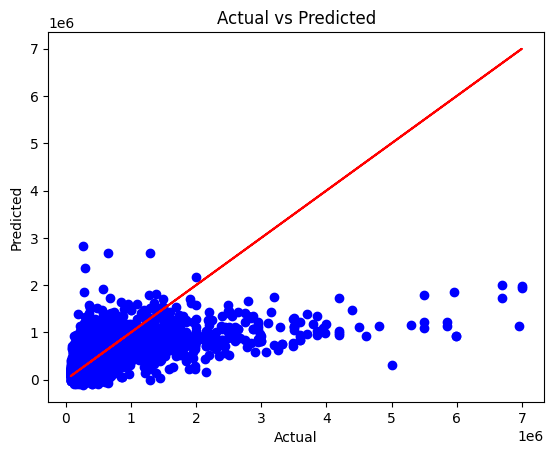

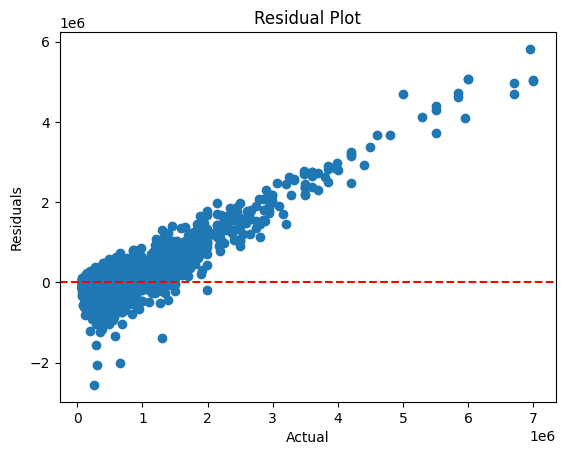

In [597]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # Plotting the perfect fit line
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


def get_data():
    df = pd.read_csv("data/properties.csv")
    return df


def impute_missing_values(df, strategy='mean'):
    """
    Impute missing values in a DataFrame using the specified strategy.

    Parameters:
    - df (DataFrame): The DataFrame containing missing values.
    - strategy (str): The imputation strategy. Options are 'mean' (default), 'median', or 'most_frequent'.

    Returns:
    - df_imputed (DataFrame): DataFrame with missing values imputed.
    """
    imputer = SimpleImputer(strategy=strategy)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

    # Example usage:
    # df_imputed = impute_missing_values(df)


def clean_data(df):
    # Drop columns
    df = df.drop(['latitude', 'longitude', 'id', 'cadastral_income', 'zip_code', 
                              'construction_year', 'primary_energy_consumption_sqm', 'surface_land_sqm'], axis=1)
       
    # Remove outliers 
#    df = df[df['total_area_sqm'] < 5000]
#    df = df[df['price'] < 8000000]

    # Keep max number of frontages to 4
#    df.loc[df['nbr_frontages'] > 4, 'nbr_frontages'] = 4
    df['nbr_frontages'] = df['nbr_frontages'].fillna(1)

    # Keep max number of bedrooms to 12
#   df.loc[df['nbr_bedrooms'] > 12, 'nbr_bedrooms'] = 12
    df['nbr_bedrooms'] = df['nbr_bedrooms'].fillna(0)

    # Fill blank garden and terrace areas with 0
    df['garden_sqm'] = df['garden_sqm'].fillna(0)
    df['terrace_sqm'] = df['terrace_sqm'].fillna(0)

    # Fill blank surface_land_sqm, assume 2 floors
    #df['surface_land_sqm'] = df['garden_sqm'] + df['terrace_sqm'] + df['total_area_sqm'] / 2 

    # Remove rows with blank 
    #df.dropna(subset=['total_area_sqm'], inplace=True)
    #df.dropna(subset=['locality'], inplace=True)

    # Keep only numeric columns
    df = df.select_dtypes(include=['float64', 'int64'])

    return df


def one_hot_encode(df, columns):
    """
    Perform one-hot encoding on specified categorical columns in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the columns to be one-hot encoded.
    - columns (list): List of column names to be one-hot encoded.

    Returns:
    - df_encoded (DataFrame): DataFrame with one-hot encoded columns concatenated.
    """
    df_encoded = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
    
    for col in columns:
        # Perform one-hot encoding using pandas get_dummies function
        one_hot_encoded = pd.get_dummies(df[col], prefix=col)
        # Concatenate the one-hot encoded columns with the original DataFrame
        df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)
        # Drop the original categorical column
        df_encoded.drop(col, axis=1, inplace=True)
    
    return df_encoded

    # Example usage:
    # df_encoded = one_hot_encode(df, ['locality'])


def scale_and_concat(df, columns_to_scale, scaler='min_max'):
    """
    Scale specified numerical columns in a DataFrame and concatenate them with the original DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the columns to be scaled.
    - columns_to_scale (list): List of column names to be scaled.
    - scaler (str): Type of scaler to use, either 'min_max' (default) or 'standard'.

    Returns:
    - df_scaled (DataFrame): DataFrame with scaled columns concatenated.
    """
    #df_scaled = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
    
    # Perform scaling
    if scaler == 'min_max':
        scaler = MinMaxScaler()
    elif scaler == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid scaler type. Use 'min_max' or 'standard'.")
    
    scaled_data = scaler.fit_transform(df[columns_to_scale])
    df[columns_to_scale] = scaled_data
    
    return df


def linear_regression(X, y, test_size=0.2, random_state=42):
    """
    Perform linear regression.

    Parameters:
    - X (DataFrame or array-like): Features.
    - y (Series or array-like): Target variable.
    - test_size (float): The proportion of the dataset to include in the test split.
    - random_state (int): Random state for reproducibility.

    Returns:
    - model (LinearRegression): Trained linear regression model.
    - X_train, X_test, y_train, y_test: Split datasets.
    - mse (float): Mean squared error.
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    scale_and_concat(X_train, ['total_area_sqm', 'garden_sqm', 'terrace_sqm'], scaler='standard')
    scale_and_concat(X_test, ['total_area_sqm', 'garden_sqm', 'terrace_sqm'], scaler='standard')

    # Instantiate and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, X_train, X_test, y_train, y_test

    # Example usage:
    # model, X_train, X_test, y_train, y_test, mse = linear_regression(X, y)

from sklearn.metrics import mean_squared_error, r2_score


def evaluate_model(model, X_test, y_test):
    """
    Evaluate a regression model using mean squared error and R-squared score.

    Parameters:
    - model: Trained regression model.
    - X_test (DataFrame or array-like): Test features.
    - y_test (Series or array-like): True test labels.

    Returns:
    - mse (float): Mean squared error.
    - r2 (float): R-squared score.
    """
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    return mse, r2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 50), cv=5):
    """
    Plot learning curves for a given estimator.

    Parameters:
    - estimator: The machine learning model to plot the learning curve for.
    - X: The input features.
    - y: The target labels.
    - train_sizes: The relative or absolute numbers of training examples used to generate the curve.
    - cv: Number of cross-validation folds.

    Returns:
    - None (plots the learning curve).
    """
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    plt.xlabel('Number of training examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_learning_curve(model, X_train, y_train)



df = get_data()
#df = one_hot_encode(df, ['property_type', 'locality'])
#print(df.columns)
df = clean_data(df)
df = impute_missing_values(df)
model, X_train, X_test, y_train, y_test = linear_regression(df, df['price'], random_state=42)
mse, r2 = evaluate_model(model, X_test, y_test)
print(mse, r2)
plot_learning_curve(model, X_train, y_train)
plot_learning_curve(model, X_test, y_test)
